# Stock Price prediction using Facebook Prophet 

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
!pip install prophet
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [5]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [31]:
df = pd.read_csv('SADBHAV.csv')

In [32]:
#read_csv function from pandas

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-03-01,21.527472,33.113167,19.766132,31.376289,29.434357,201979996.0
1,2006-03-02,33.269730,37.320808,31.801947,33.372475,31.306999,92643702.0
2,2006-03-03,33.240372,34.121044,31.655169,32.325455,30.324774,43381419.0
3,2006-03-06,31.312687,33.807915,31.214834,31.527962,29.576641,20520337.0
4,2006-03-07,31.527962,31.968294,30.094427,30.392876,28.511808,13284328.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4185 non-null   object 
 1   Open       4178 non-null   float64
 2   High       4178 non-null   float64
 3   Low        4178 non-null   float64
 4   Close      4178 non-null   float64
 5   Adj Close  4178 non-null   float64
 6   Volume     4178 non-null   float64
dtypes: float64(6), object(1)
memory usage: 229.0+ KB


In [35]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4.178000e+03
mean,143.859013,147.186209,140.613194,143.630931,140.596771,4.727559e+05
std,103.453258,105.176086,101.511905,103.187903,102.168707,3.787783e+06
min,10.900000,11.300000,10.200000,11.000000,11.000000,0.000000e+00
25%,58.702823,60.351534,56.756692,58.457835,56.353365,2.893750e+04
50%,119.463733,122.974998,116.971550,119.700081,115.663193,1.085220e+05
75%,229.037502,236.000000,222.512497,228.662498,225.826248,3.520180e+05
max,437.000000,440.000000,421.799988,429.500000,424.843048,2.019800e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [36]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [37]:
px.area(df, x="Date", y="Close")

In [38]:
px.line(df, x="Date", y="Close")

In [39]:
px.area(df, x="Date", y="Volume")

In [40]:
px.bar(df, y="Volume")

In [41]:
px.box(df, y="Close")

# Understanding Facebook Prophet

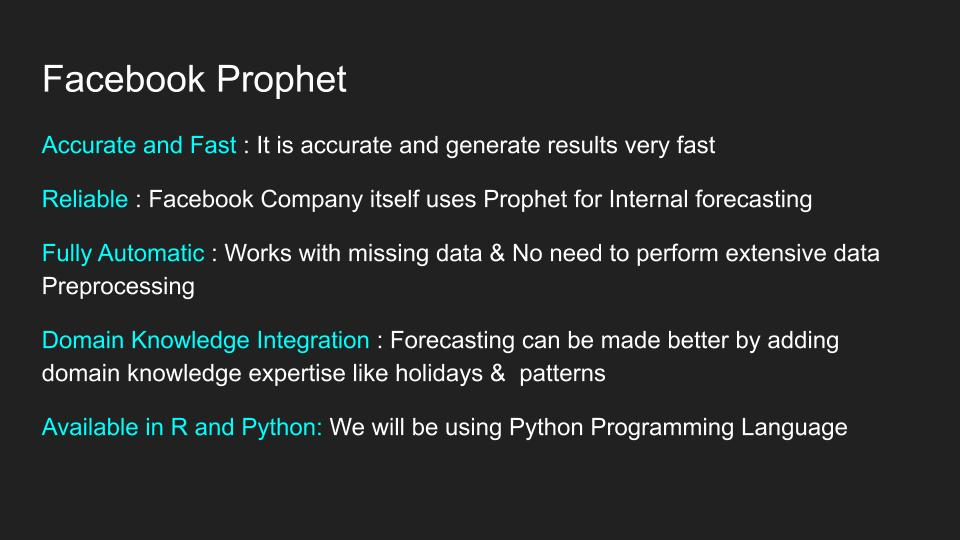

## Data Preperation

In [42]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-03-01,21.527472,33.113167,19.766132,31.376289,29.434357,201979996.0
1,2006-03-02,33.269730,37.320808,31.801947,33.372475,31.306999,92643702.0
2,2006-03-03,33.240372,34.121044,31.655169,32.325455,30.324774,43381419.0
3,2006-03-06,31.312687,33.807915,31.214834,31.527962,29.576641,20520337.0
4,2006-03-07,31.527962,31.968294,30.094427,30.392876,28.511808,13284328.0
...,...,...,...,...,...,...,...
4180,2023-01-30,12.700000,12.850000,12.250000,12.550000,12.550000,373094.0
4181,2023-01-31,12.500000,13.000000,12.350000,12.850000,12.850000,171310.0
4182,2023-02-01,12.850000,13.450000,12.200000,12.300000,12.300000,423585.0
4183,2023-02-02,12.200000,12.900000,12.100000,12.650000,12.650000,121856.0


In [43]:
col=['Date','Close']
ndf=pd.DataFrame(df,columns=col)

In [44]:
ndf

,Date,Close
0,2006-03-01,31.376289
1,2006-03-02,33.372475
2,2006-03-03,32.325455
3,2006-03-06,31.527962
4,2006-03-07,30.392876
...,...,...
4180,2023-01-30,12.550000
4181,2023-01-31,12.850000
4182,2023-02-01,12.300000
4183,2023-02-02,12.650000


In [45]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [46]:
prophet_df

,ds,y
0,2006-03-01,31.376289
1,2006-03-02,33.372475
2,2006-03-03,32.325455
3,2006-03-06,31.527962
4,2006-03-07,30.392876
...,...,...
4180,2023-01-30,12.550000
4181,2023-01-31,12.850000
4182,2023-02-01,12.300000
4183,2023-02-02,12.650000


## Creating Facebook Prophet Model

In [47]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp21eyj3uz/0ionpl_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp21eyj3uz/7sihr7t8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15598', 'data', 'file=/tmp/tmp21eyj3uz/0ionpl_n.json', 'init=/tmp/tmp21eyj3uz/7sihr7t8.json', 'output', 'file=/tmp/tmp21eyj3uz/prophet_modelf83uckho/prophet_model-20230205134203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:42:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:42:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [48]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-03-01,23.059383,-12.852262,48.923283,23.059383,23.059383,-5.453711,-5.453711,-5.453711,-0.876593,-0.876593,-0.876593,-4.577118,-4.577118,-4.577118,0.0,0.0,0.0,17.605672
1,2006-03-02,23.153293,-13.557593,51.326262,23.153293,23.153293,-4.580754,-4.580754,-4.580754,-0.349484,-0.349484,-0.349484,-4.231269,-4.231269,-4.231269,0.0,0.0,0.0,18.572540
2,2006-03-03,23.247204,-13.237948,51.998934,23.247204,23.247204,-4.614840,-4.614840,-4.614840,-0.762391,-0.762391,-0.762391,-3.852449,-3.852449,-3.852449,0.0,0.0,0.0,18.632364
3,2006-03-06,23.528936,-9.821217,48.402536,23.528936,23.528936,-3.125302,-3.125302,-3.125302,-0.545909,-0.545909,-0.545909,-2.579393,-2.579393,-2.579393,0.0,0.0,0.0,20.403634
4,2006-03-07,23.622847,-8.132503,53.289618,23.622847,23.622847,-2.530742,-2.530742,-2.530742,-0.399912,-0.399912,-0.399912,-2.130830,-2.130830,-2.130830,0.0,0.0,0.0,21.092104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,2023-03-01,-2.996427,-39.947813,20.325696,-2.996427,-2.996427,-5.534362,-5.534362,-5.534362,-0.876593,-0.876593,-0.876593,-4.657769,-4.657769,-4.657769,0.0,0.0,0.0,-8.530789
4211,2023-03-02,-3.092305,-36.140301,23.483420,-3.092305,-3.092305,-4.670532,-4.670532,-4.670532,-0.349484,-0.349484,-0.349484,-4.321048,-4.321048,-4.321048,0.0,0.0,0.0,-7.762837
4212,2023-03-03,-3.188183,-39.282973,20.560219,-3.188183,-3.188183,-4.712315,-4.712315,-4.712315,-0.762391,-0.762391,-0.762391,-3.949924,-3.949924,-3.949924,0.0,0.0,0.0,-7.900498
4213,2023-03-04,-3.284061,-61.687614,-2.152284,-3.284061,-3.284061,-27.627961,-27.627961,-27.627961,-24.077678,-24.077678,-24.077678,-3.550283,-3.550283,-3.550283,0.0,0.0,0.0,-30.912022


In [50]:
px.line(forecast, x='ds', y='yhat')

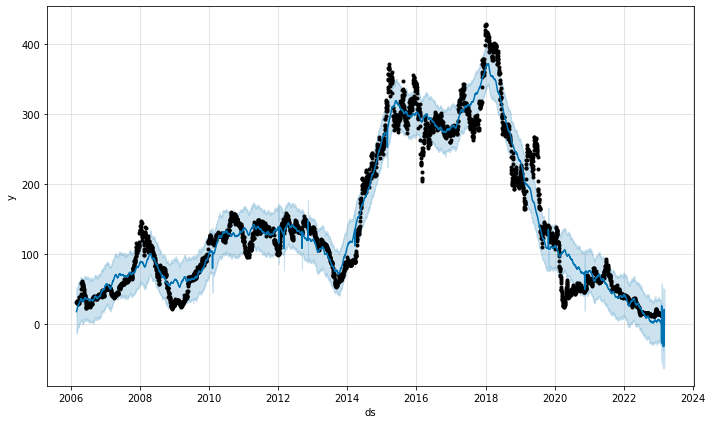

In [51]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

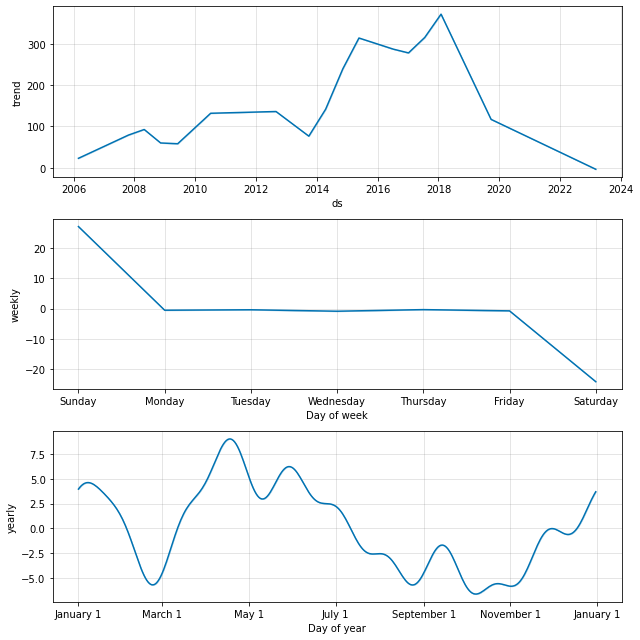

In [52]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [53]:
from google.colab import files
forecast.to_csv('forecast.csv')
#files.download('forecast.csv')